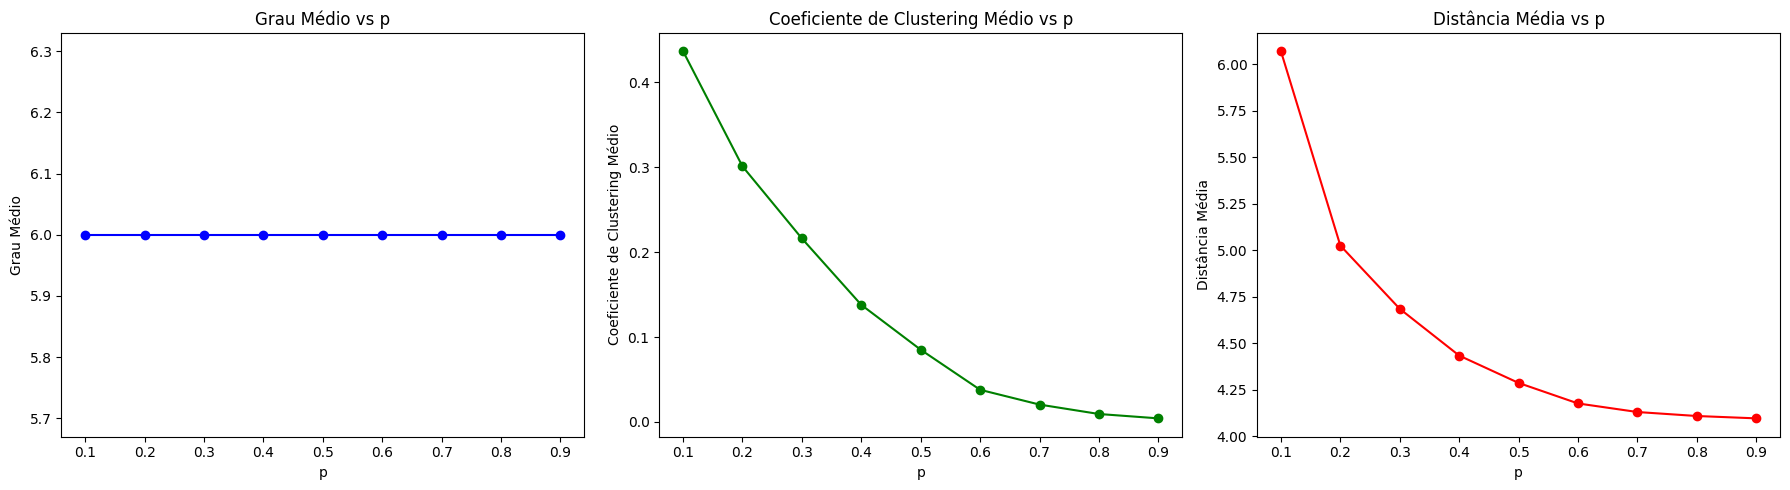

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parâmetros da rede
n = 1000
k = 6
p_values = np.arange(0.1, 1.0, 0.1)  # Valores de p de 0.1 até 0.9

# Listas para armazenar as métricas
grau_medio_list = []
clustering_list = []
distancia_media_list = []

for p in p_values:
    # Gerar a rede de Watts-Strogatz
    G = nx.watts_strogatz_graph(n, k, p)
    
    # Calcular as métricas
    grau_medio = sum(dict(G.degree()).values()) / len(G)
    clustering = nx.average_clustering(G)
    
    # Nota: A distância média pode não estar bem definida para redes desconexas
    if nx.is_connected(G):
        distancia_media = nx.average_shortest_path_length(G)
    else:
        distancia_media = float('inf')
    
    # Armazenar as métricas
    grau_medio_list.append(grau_medio)
    clustering_list.append(clustering)
    distancia_media_list.append(distancia_media)

# Criar gráficos
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(p_values, grau_medio_list, marker='o', linestyle='-', color='b')
plt.title('Grau Médio vs p')
plt.xlabel('p')
plt.ylabel('Grau Médio')

plt.subplot(1, 3, 2)
plt.plot(p_values, clustering_list, marker='o', linestyle='-', color='g')
plt.title('Coeficiente de Clustering Médio vs p')
plt.xlabel('p')
plt.ylabel('Coeficiente de Clustering Médio')

plt.subplot(1, 3, 3)
plt.plot(p_values, distancia_media_list, marker='o', linestyle='-', color='r')
plt.title('Distância Média vs p')
plt.xlabel('p')
plt.ylabel('Distância Média')

plt.tight_layout()
plt.show()

In [3]:
# Criar uma lista de tuplas (p, grau_medio, clustering, distancia_media)
metricas = [(p, grau_medio, clustering, distancia_media) for p, grau_medio, clustering, distancia_media in zip(p_values, grau_medio_list, clustering_list, distancia_media_list)]

# Imprimir as tuplas
for p, grau_medio, clustering, distancia_media in metricas:
    print(f"(p = {p:.1f}: Grau Médio = {grau_medio}, Coeficiente de Clustering Médio = {clustering}, Distância Média = {distancia_media})")


(p = 0.1: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.4368722222222222, Distância Média = 6.071565565565566)
(p = 0.2: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.3012299422799423, Distância Média = 5.026400400400401)
(p = 0.3: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.21626984126984128, Distância Média = 4.686146146146146)
(p = 0.4: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.13799761904761906, Distância Média = 4.434652652652653)
(p = 0.5: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.08514704184704185, Distância Média = 4.287621621621621)
(p = 0.6: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.03793080808080808, Distância Média = 4.177225225225225)
(p = 0.7: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.02050945165945166, Distância Média = 4.131129129129129)
(p = 0.8: Grau Médio = 6.0, Coeficiente de Clustering Médio = 0.009414435564435565, Distância Média = 4.10968968968969)
(p = 0.9: Grau Médio = 6.0, Coeficiente de

Quantidade de nós: 1000
Quantidade de arestas: 3000


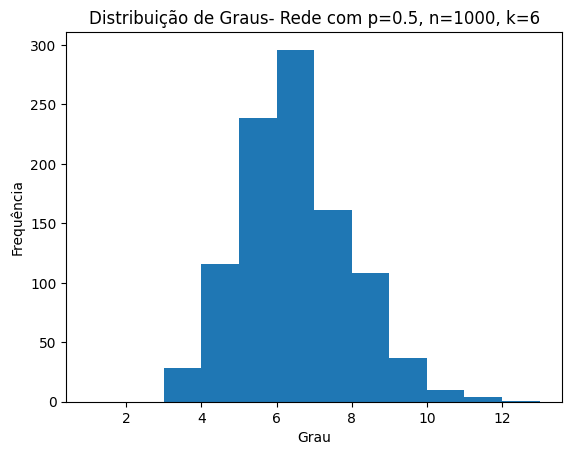

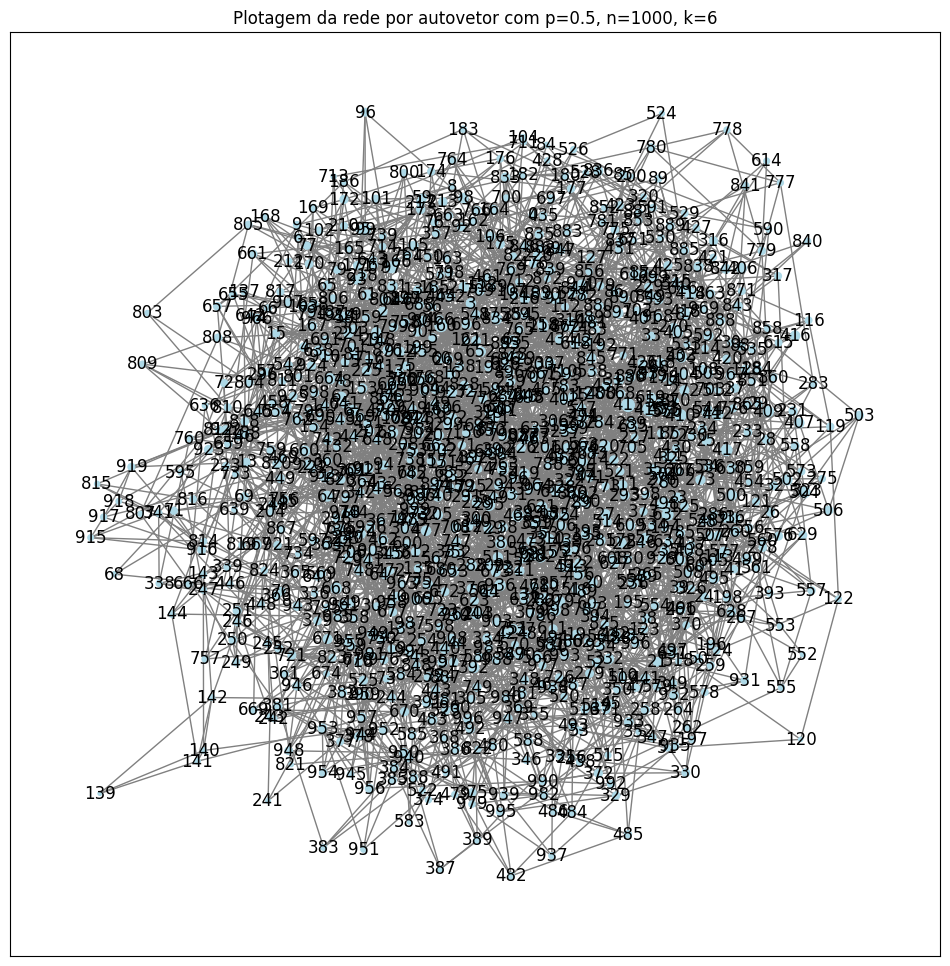

In [4]:
#Para p = 0.5
n = 1000
k = 6 
p = 0.5

g = nx.watts_strogatz_graph(n,k,p)

# Calcular métricas para a rede
nodes = nx.number_of_nodes(g)
arestas = nx.number_of_edges(g)

# Plotar a distribuição de graus e a rede para Les Misérables
print(f'Quantidade de nós: {nodes}')
print(f'Quantidade de arestas: {arestas}')

# Função para plotar a distribuição de graus
def plot_grau_distribuicao(G, titulo):
    graus = [d for n, d in G.degree()]
    plt.hist(graus, bins=range(1, max(graus)+1))
    plt.title(titulo)
    plt.xlabel('Grau')
    plt.ylabel('Frequência')
    plt.show()

# Função para plotar a rede com centralidade de autovetor
def plot_rede(G, titulo):
    pos = nx.spring_layout(G)
    centralidade = nx.eigenvector_centrality(G)
    tam_nos = [1000 * centralidade[n] for n in G.nodes()]

    plt.figure(figsize=(12, 12))
    nx.draw_networkx(G, pos, node_size=tam_nos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(titulo)
    plt.show()

plot_grau_distribuicao(g, 'Distribuição de Graus- Rede com p=0.5, n=1000, k=6')
plot_rede(g, 'Plotagem da rede por autovetor com p=0.5, n=1000, k=6')